# Preliminary Analysis 

Analysis of artificial aneurysms introduced in the RCA with ASI = 2, at 3 positions, with 5 sizes per position

In [1]:
import numpy as np
import vtk
from vtk.util import numpy_support as nps
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import os 

In [2]:
from AneurysmGeneration.utils.batch import * 


Gotta read in the simulation results 

In [3]:
# define path
results_path_base = 'Artificial/RCA/'
source_path_base = 'AneurysmGeneration/models/SKD0050/'

In [4]:
def return_polydata(path, return_reader=False):
    '''
        Given a file name, open and return the data
    '''

    print 'return polydata'


    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(path)
    reader.Update()
    polydata = reader.GetOutput()

    if return_reader:
        return (polydata, reader)

    return polydata

Read in the clipped aneurysms 

In [5]:
clipped_dir = 'clipped_results/'
vessel = 'RCA/'
zscores=[6, 8, 10, 12, 14]
proximal = ['p1', 'p2', 'p3', 'p4', 'p5']
medial = ['m1', 'm2', 'm3', 'm4', 'm5']
distal = ['d1', 'd2', 'd3', 'd4']

In [6]:
vtawss_dict = {}
vtawss_avgs = np.zeros((3, 5))
for i, position in enumerate([proximal, medial, distal]):
    for j, size in enumerate(zscores): 
        if j >= len(position): continue
        aneurysm = position[j]
        path_to_clipped_result = clipped_dir + vessel + aneurysm + '.vtp'
        clipped_result_polydata = return_polydata(path_to_clipped_result)
        v_tawss = nps.vtk_to_numpy(clipped_result_polydata.GetPointData().GetArray('vTAWSS'))
        vtawss_avgs[i, j] = np.mean(v_tawss)
        vtawss_dict[(i, j)] = v_tawss
        
# for aneurysm in proximal + medial:
#     print aneurysm
#     path_to_clipped_result = clipped_dir + vessel + aneurysm + '.vtp'
#     clipped_result_polydata = return_polydata(path_to_clipped_result)
#     v_tawss = nps.vtk_to_numpy(clipped_result_polydata.GetPointData().GetArray('vTAWSS'))
#     vtawss_dict[aneurysm] = np.mean(v_tawss)
    

return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata


In [15]:
print vtawss_dict


{'p2': 6.07174989229854, 'p3': 5.206429806529813, 'p1': 6.998043617719476, 'p4': 4.876249458564606, 'p5': 4.585406472982285, 'm5': 5.644561416716597, 'm4': 6.912220939381048, 'm1': 10.700187471532518, 'm3': 8.848821808063244, 'm2': 9.338163431605125}


In [12]:
print vtawss_avgs

[[ 6.99804362  6.07174989  5.20642981  4.87624946  4.58540647]
 [10.70018747  9.33816343  8.84882181  6.91222094  5.64456142]
 [ 8.35430023  8.02121221  6.75150009  6.25617556  0.        ]]


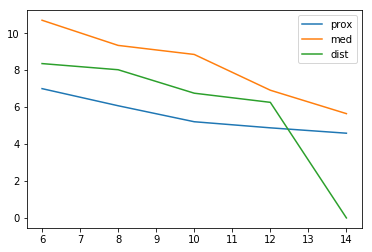

In [17]:
labels = ['prox', 'med', 'dist']
plt.figure()
for i in range(len([proximal, medial, distal])):
    plt.plot(zscores, vtawss_avgs[i], label=labels[i])
    
plt.legend()


In [7]:
ss = vtawss_dict[(0, 0)]
print ss.shape

(3614,)


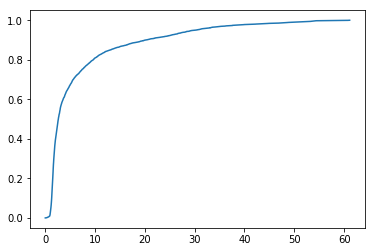

In [10]:
labels = [['p1', 'p2', 'p3', 'p4', 'p5'],
          ['m1', 'm2', 'm3', 'm4', 'm5'],
          ['d1', 'd2', 'd3', 'd4', 'd5']]

ss_sorted = np.sort(ss)
plt.plot(ss_sorted, np.array(range(len(ss)))/float(len(ss)))